In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
import pandas as pd
import pathlib
import PIL
import zipfile
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import time


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
json_file = "/content/drive/MyDrive/AML/proj-data/nearest_neighbors2.json"

sim_df = pd.read_json(json_file)
sim_df

,similarity,master_pi,similar_pi
0,0.9656,710832001,709141001
1,0.9472,710832001,670944002
2,0.9434,710832001,746817001
3,0.9405,710832001,693604007
4,0.9398,710832001,847277001
...,...,...,...
945724,0.9598,901575001,764758004
945725,0.9567,901575001,935667002
945726,0.9553,901575001,935667001
945727,0.9530,901575001,694296001


In [8]:
images_ds = "/content/drive/MyDrive/AML/proj-data/images.zip"

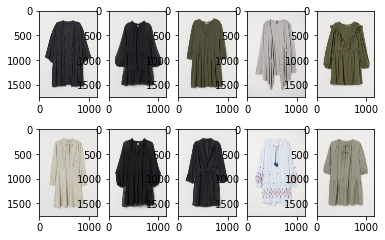

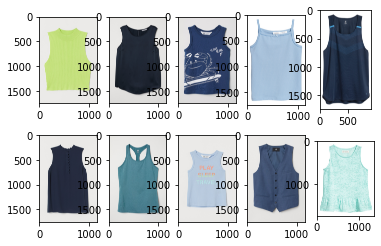

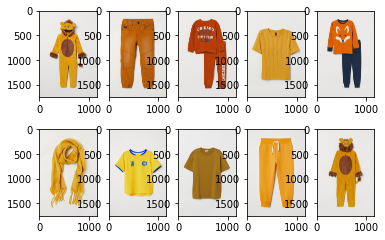

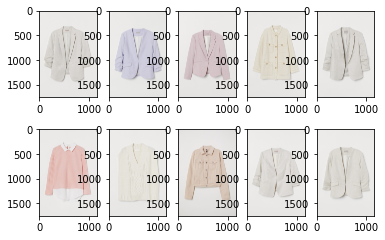

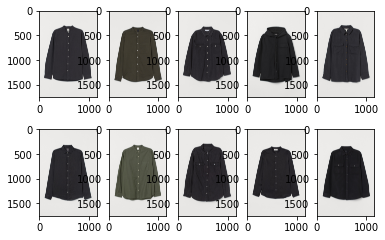

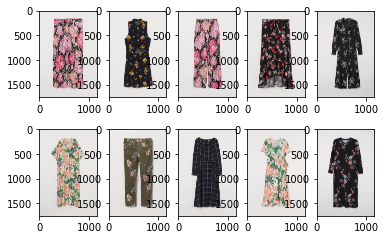

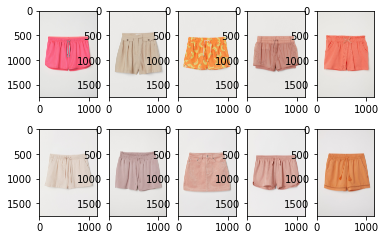

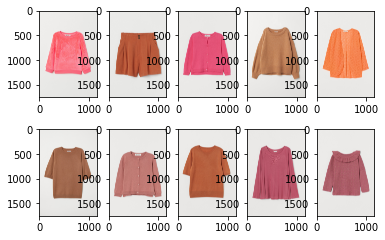

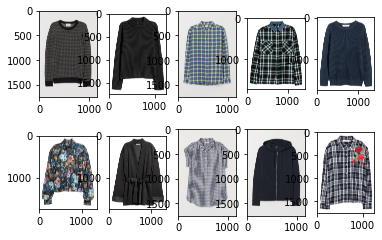

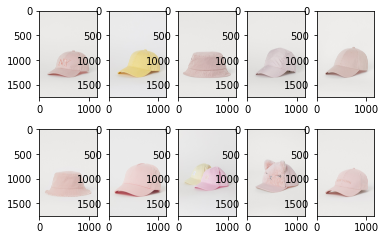

In [9]:
import zipfile
from PIL import Image
import random

imgzip = zipfile.ZipFile(images_ds)
inflist = imgzip.infolist()


cnt = 0
while cnt < 10:
  f = random.choice(inflist)
  name = f.filename.split("/")[1].split(".")[0]
  reccs = sim_df[sim_df['master_pi'] == int(name[1:])]['similar_pi'].tolist()
  if len(reccs) == 0:
    continue

  ifile = imgzip.open(f.filename)
  main_img = Image.open(ifile)

  f, axarr = plt.subplots(2,5)
  for idx, recc in enumerate(reccs):
    recc_file = [j for j in inflist if j.filename.split("/")[1].split(".")[0] == '0'+str(recc)][0]
    ifile = imgzip.open(recc_file)
    img = Image.open(ifile)
    axarr[int(idx/5),int(idx%5)].imshow(img)
  axarr[1,4].imshow(main_img)
  cnt += 1